<a href="https://colab.research.google.com/github/Linomc/Dimensionamento_Backend/blob/main/saeb_rotina_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rotinas de limpeza de DADOS do **SAEB**

In [ ]:
!pip install missingno

In [ ]:
from google.colab import drive, files
import pandas as pd
import statistics
import missingno as msno

drive.mount('/gdrive')

Mounted at /gdrive


# Criando a lista com as colunas necessárias do data frame

* Em documentos oficiais tem sempre o dicionario. por isso fui nele e irei trabalhar, com duas bases dentro da tabela, primeiro analisarei a 5ª série.. irei baixar somente os dados que se referem a ela. depois usarei a mesma rotina atualizando as colunas que preciso para a 9ª série

In [ ]:
# tabela para análise da 5 serie.
variaveis = [
    'ID_REGIAO','ID_UF','ID_MUNICIPIO','ID_AREA','ID_ESCOLA','IN_PUBLICA',
    'ID_LOCALIZACAO','NU_MATRICULADOS_CENSO_5EF','NU_PRESENTES_5EF','NIVEL_0_MT5',
    'NIVEL_1_MT5','NIVEL_2_MT5','NIVEL_3_MT5','NIVEL_4_MT5','NIVEL_5_MT5','NIVEL_6_MT5',
    'NIVEL_7_MT5','NIVEL_8_MT5','NIVEL_9_MT5','NIVEL_10_MT5'
]

In [ ]:
url = input(': ')

: /gdrive/MyDrive/03 - Projeto_Disc_Estatistica/projeto/saeb_2021/DADOS/TS_ESCOLA.csv


# Tabela, do **SAEB**

* Baixar a tabela com apenas o irei trabalhar.. dessa forma ganho velocidade e faço as análises em sequência.
  - fiz o upload normalmente pelo método read_csv - mas a novidade foi usar o usecol, esse parâmetro informa que só será trazido para o data frame as **colunas (variaveis)** definidas.

In [ ]:
arquivo_saeb = pd.read_csv(url,sep = ';', encoding = 'latin-1',usecols=variaveis)

In [ ]:
# verificando quanto de memória foi usada.
arquivo_saeb.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70897 entries, 0 to 70896
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_REGIAO                  70897 non-null  int64  
 1   ID_UF                      70897 non-null  int64  
 2   ID_MUNICIPIO               70897 non-null  int64  
 3   ID_AREA                    70897 non-null  int64  
 4   ID_ESCOLA                  70897 non-null  int64  
 5   IN_PUBLICA                 70897 non-null  int64  
 6   ID_LOCALIZACAO             70897 non-null  int64  
 7   NU_MATRICULADOS_CENSO_5EF  45798 non-null  float64
 8   NU_PRESENTES_5EF           45865 non-null  float64
 9   NIVEL_0_MT5                32665 non-null  float64
 10  NIVEL_1_MT5                32665 non-null  float64
 11  NIVEL_2_MT5                32665 non-null  float64
 12  NIVEL_3_MT5                32665 non-null  float64
 13  NIVEL_4_MT5                32665 non-null  flo

# Recortar o data frame original para o subconjunto desejado p/ análise, nesse caso:

## **ID_UF=33**, **ID_AREA=1**, **IN_PUBLICA=1**.

* OBS. todas as informações e códigos que informei nesse texto, foram retirados da planilha **DICIONÁRIO**

In [ ]:

escolas_rio = arquivo_saeb[arquivo_saeb['ID_UF']==33]
escolas_rio = escolas_rio[escolas_rio['ID_AREA']==1]
escolas_rio = escolas_rio[escolas_rio['IN_PUBLICA']==1]

<Axes: >

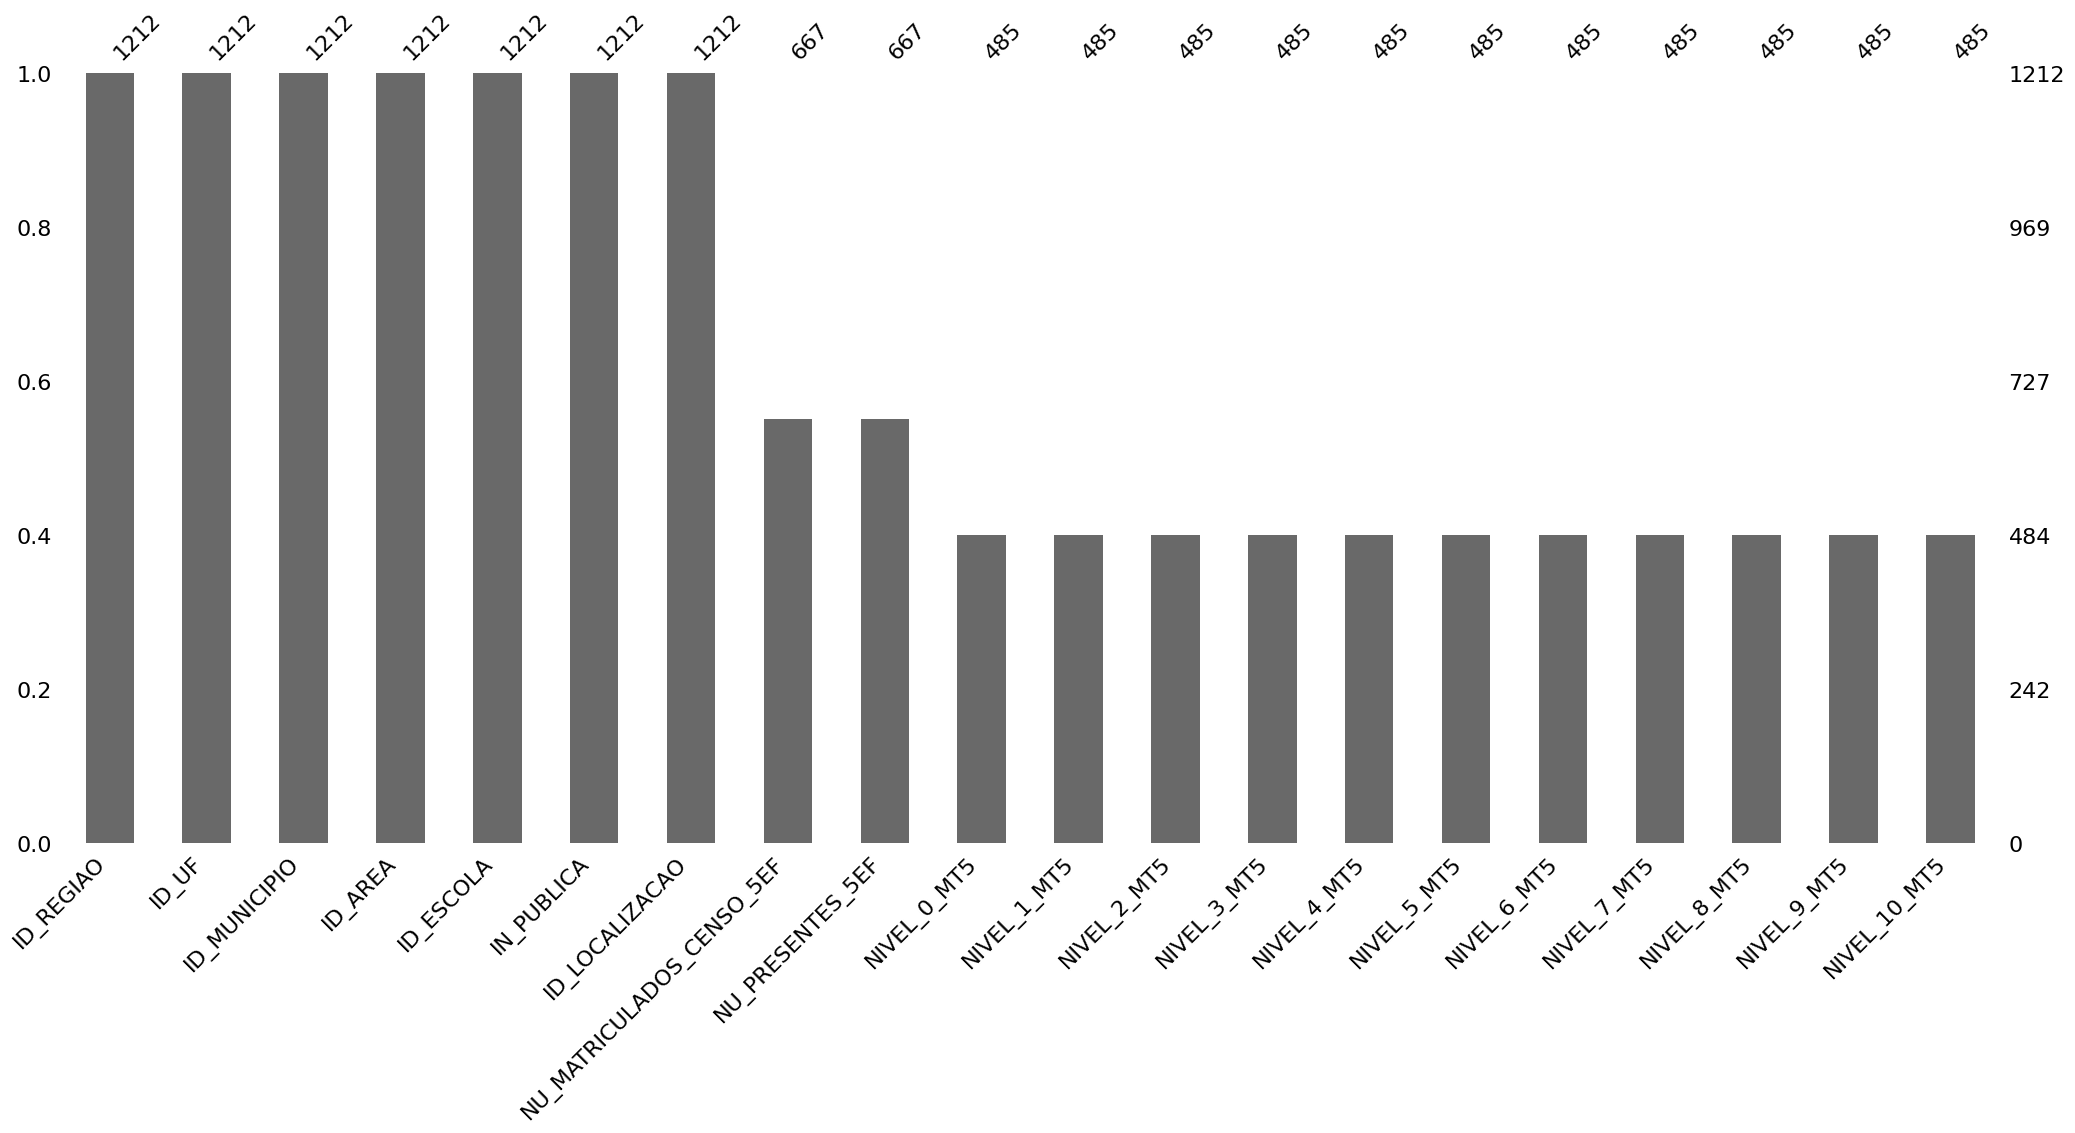

In [ ]:
msno.bar(escolas_rio)

# Retirando valores nulos (Nan) das variáveis de __NIVEL__

In [ ]:
escolas_rio.dropna(subset=[
    'NIVEL_0_MT5','NIVEL_1_MT5','NIVEL_2_MT5','NIVEL_3_MT5','NIVEL_4_MT5','NIVEL_5_MT5',
    'NIVEL_6_MT5','NIVEL_7_MT5','NIVEL_9_MT5','NIVEL_10_MT5'],inplace=True)
#msno.bar(escolas_rio)

# Data Frame do RJ. Verificar as distribuições pelo método: __describe__

# O resultado percentual de maior peso se dá no **Nível 04**

## hoje 26/06 - após reunião da assessoria do GAE. Vou avaliar as escolas com resultados de dois níveis, e relacionar com a tabela professor.
  - Conversei com o prof. David

In [ ]:
distrib_school_Rio = escolas_rio[['NU_PRESENTES_5EF','NIVEL_0_MT5','NIVEL_1_MT5','NIVEL_2_MT5','NIVEL_3_MT5','NIVEL_4_MT5','NIVEL_5_MT5',
    'NIVEL_6_MT5','NIVEL_7_MT5','NIVEL_8_MT5','NIVEL_9_MT5','NIVEL_10_MT5']].describe()

print ('Total de escolas:', escolas_rio['ID_ESCOLA'].count())
print ('total de alunos presentes para o SAEB de 2021:',escolas_rio['NU_PRESENTES_5EF'].sum())
display(distrib_school_Rio)

Total de escolas: 485
total de alunos presentes para o SAEB de 2021: 36435.0


,NU_PRESENTES_5EF,NIVEL_0_MT5,NIVEL_1_MT5,NIVEL_2_MT5,NIVEL_3_MT5,NIVEL_4_MT5,NIVEL_5_MT5,NIVEL_6_MT5,NIVEL_7_MT5,NIVEL_8_MT5,NIVEL_9_MT5,NIVEL_10_MT5
count,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000
mean,75.123711,2.511629,7.046062,13.519216,19.567753,21.161052,17.517258,10.921608,5.434247,1.907505,0.412041,0.001299
std,36.951962,3.045783,4.827343,6.771560,6.699349,6.020667,6.073652,5.691373,4.480777,2.583643,1.115295,0.028607
min,11.000000,0.000000,0.000000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,0.000000,3.260000,8.230000,15.070000,17.390000,12.820000,6.740000,2.320000,0.000000,0.000000,0.000000
50%,65.000000,1.760000,6.560000,13.650000,19.630000,20.760000,17.600000,10.290000,4.300000,1.250000,0.000000,0.000000
75%,94.000000,3.650000,10.170000,17.540000,23.700000,24.620000,21.430000,14.080000,7.450000,2.780000,0.000000,0.000000
max,306.000000,35.780000,25.100000,41.940000,43.480000,46.030000,36.360000,32.000000,27.850000,18.770000,13.850000,0.630000


## Criar os data frame do __nível 02__ e __nível 06__.

* Obs. Método utilizado, repensando.
### Pergunta: __Se pesquiso resultados diferentes em para o mesmo grupo (alunos da 5ª série no ensino fundamental, penso em verificar origens diferentes(as escolas com resultados diferentes)__

In [ ]:
#
df1 = escolas_rio[['ID_ESCOLA','NU_PRESENTES_5EF','NIVEL_1_MT5']].loc[escolas_rio['NIVEL_1_MT5']>20].set_index(['ID_ESCOLA'])
df7 = escolas_rio[['ID_ESCOLA','NU_PRESENTES_5EF','NIVEL_7_MT5']].loc[escolas_rio['NIVEL_7_MT5']>20].set_index(['ID_ESCOLA'])

In [ ]:
df1.info()
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 61327216 to 61368411
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NU_PRESENTES_5EF  5 non-null      float64
 1   NIVEL_1_MT5       5 non-null      float64
dtypes: float64(2)
memory usage: 120.0 bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 61367234 to 61392954
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NU_PRESENTES_5EF  6 non-null      float64
 1   NIVEL_7_MT5       6 non-null      float64
dtypes: float64(2)
memory usage: 144.0 bytes


In [ ]:
df2 = escolas_rio[['ID_ESCOLA','NU_PRESENTES_5EF','NIVEL_2_MT5']].loc[escolas_rio['NIVEL_2_MT5']>25].set_index(['ID_ESCOLA'])
df6 = escolas_rio[['ID_ESCOLA','NU_PRESENTES_5EF','NIVEL_6_MT5']].loc[escolas_rio['NIVEL_6_MT5']>25].set_index(['ID_ESCOLA'])

In [ ]:
df2.info()
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 61326036 to 61396191
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NU_PRESENTES_5EF  22 non-null     float64
 1   NIVEL_2_MT5       22 non-null     float64
dtypes: float64(2)
memory usage: 528.0 bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 61327223 to 61385692
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NU_PRESENTES_5EF  10 non-null     float64
 1   NIVEL_6_MT5       10 non-null     float64
dtypes: float64(2)
memory usage: 240.0 bytes


In [ ]:
df2 = escolas_rio[['ID_ESCOLA','NU_PRESENTES_5EF','NIVEL_2_MT5']].loc[escolas_rio['NIVEL_2_MT5']>25].set_index(['ID_ESCOLA'])
df5 = escolas_rio[['ID_ESCOLA','NU_PRESENTES_5EF','NIVEL_5_MT5']].loc[escolas_rio['NIVEL_5_MT5']>25].set_index(['ID_ESCOLA'])

In [ ]:
df2.info()
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 61326036 to 61396191
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NU_PRESENTES_5EF  22 non-null     float64
 1   NIVEL_2_MT5       22 non-null     float64
dtypes: float64(2)
memory usage: 528.0 bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 61327239 to 61392970
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NU_PRESENTES_5EF  58 non-null     float64
 1   NIVEL_5_MT5       58 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


In [ ]:
nv2_index = pd.DataFrame(df2.index)
nv5_index = pd.DataFrame(df5.index)

In [ ]:
for esc_2nv in nv2_index['ID_ESCOLA'].items():
  for esc_5nv in nv5_index['ID_ESCOLA'].items():
    if esc_2nv[1] == esc_5nv[1]:
      print (esc_5nv)
      df5.drop(index=esc_5nv[1])
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 61327239 to 61392970
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NU_PRESENTES_5EF  58 non-null     float64
 1   NIVEL_5_MT5       58 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


In [ ]:
df5['qtde_nv5'] = (df5['NU_PRESENTES_5EF']*round(df5['NIVEL_5_MT5']/100,2))
df2['qtde_nv2'] = df2['NU_PRESENTES_5EF']*round(df2['NIVEL_2_MT5']/100,2)
display(df5)

,NU_PRESENTES_5EF,NIVEL_5_MT5,qtde_nv5
ID_ESCOLA,,,
61327239,83.0,28.44,23.24
61327265,91.0,27.54,25.48
61331190,38.0,34.79,13.30
61331197,97.0,26.26,25.22
61331202,81.0,27.09,21.87
61331211,58.0,25.87,15.08
61332397,72.0,26.50,18.72
61338147,64.0,27.29,17.28
61338148,125.0,25.10,31.25


In [ ]:
df_nivel_2.describe()

,ID_ESCOLA,NU_PRESENTES_5EF,NIVEL_2_MT5
count,4.740000e+02,474.000000,474.000000
mean,6.136003e+07,75.808017,13.832954
std,2.077230e+04,36.708541,6.524669
min,6.132604e+07,16.000000,1.060000
25%,6.134266e+07,52.000000,8.837500
50%,6.136018e+07,65.000000,13.930000
75%,6.137664e+07,95.000000,17.632500
max,6.139621e+07,306.000000,41.940000


# Nível 04¹: subentende os Níveis anteriores
* Nivel01¹:
  * __Grandezas e Medidas__: *determinar a área de figuras desenhadas em malhas quadriculadas por meio de contagem.*
* Nível 02¹:
  * __Números e Operações__: *Resolver problemas do cotidiano envolvendo adição de pequenas quantias em dinheiro.*
  * __Tratamento de Informações__: *Localizar informações, relativas ao maior e menor elemento, em tabelas ou gráficos.*
* Nível 03¹:
  * __Espaço e Forma__:
    - *Localizar um ponto ou objeto em uma malha quadriulada, a partir de duas ou mais referências.*
    - *Reconhecer dentro um conjunto de polígonos, o que possui o maior nº de ângulos.*
    - *Associar figuras geométricas elementares a seus respectivos nomes.*
  * __Grandezas e Medidas__:
    - *Converter uma quantia, dada na ordem das unidades de real, em seu equivalente em moedas.*
    - *Determinar o horário final de um evento a partir de seu horário de início e de um intervalo de tempo dado, em formato de horas inteiras.*
  * __Números e Operações, Álgebra e Funções__:
    - *Associar a fração 1/4 a uma de suas representações gráficas.*
    - *Determinar o resultado da subtração de nº representados na forma decimal, tendo como contexto o sistema monetário.*
  * __Tratamento de Informações__:
    - *Reconhecer maior valor em uma tabela de dupla entrada cujos dados possuem até duas ordens.*
    - *Reconhecer informações em um gráfico de colunas duplas.*
----

# __Nível 04¹__:

### __Espaço e Forma__:
  * Reconhecer retângulos em meio a outros quadriláteros.
  * Reconhecer a planificação de uma pirâmide dentre um conjunto de planificações.

### __Grandezas e Medidas__:
  * determinar o total de uma quantia a partir da quantidade de moedas de 25 e/ou 50 centavos que a compõe, ou vice-versa.
  * Determinar a duração de um evento cujos horários inicial e final acontecem em minutos diferentes de uma mesma hora dada.
  * Converter horas em minutos.
  * interpretar horas em relógios de ponteiros.
### __Números e Operações; Álgebra e Funções__:
  * Determinar o resultado da manipulação de nº naturais por valores do sistema monetário nacional, expressos em nº de até duas ordens e posterior a adição.
  * Determinar os termos desconhecidos em uma sequência numérica de múltiplos de cinco.
  * Determinar a adição, c/ reserva, de até três nº naturais c/ até quatro ordens.
  * Determinar a subtração de nº naturais usando a noção de completar.
  * Determinar multiplicação de um nº natural de até três ordens por cinco, c/ reserva.
  * Determinar a divisão exata por nº de um algarismo.
  * Reconhecer o princípio do valor posicional do Sistema de Numeração Decimal.
  * Reconhecer uma fração como representação da relação parte-todo, c/ o apoio de um conjunto de até cinco figuras.
  * Associar a metade de um total ao seu equivalente em porcentagem.
  * Associar um nº natural à sua decomposição expressa por extenso.
  * Localizar um nº em uma reta numérica graduada inde estão expressos nº naturais consecutivos e uma subdivisão equivalente à metade do intervalo entre eles.
### __Tratamento de Informações__:
  * Reconhecer o maior valor em uma tabela cusjos dados possuem até oito ordens.
  * Localizar um dado em tabelas de dupla entrada.

----
##### ¹ - fonte: Ideb - escala SAEB.

# avaliando